<a href="https://colab.research.google.com/github/harjotcyber007/Hotel-Data-Google-colab/blob/main/hotel_Data_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv("/content/hotel_bookings 2.csv")


is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64


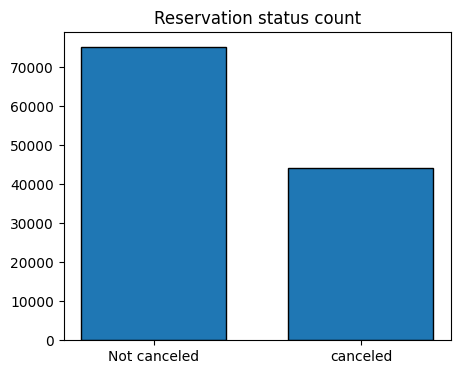

In [8]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','canceled'],df['is_canceled'].value_counts(), edgecolor = 'k',width = 0.7)
plt.show()

Text(0, 0.5, 'number of reservations')

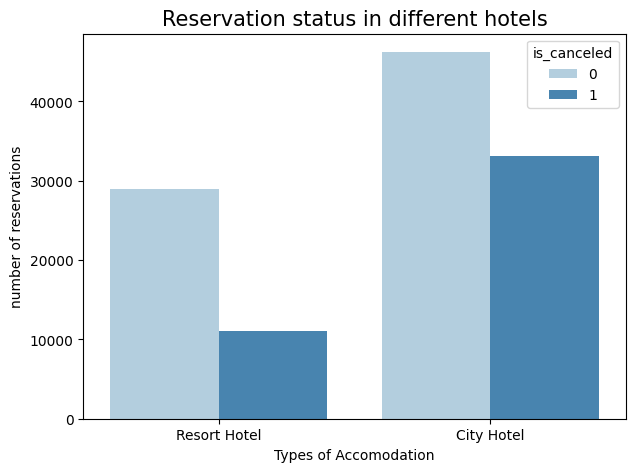

In [15]:
plt.figure(figsize = (7,5))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled',data = df, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
plt.title('Reservation status in different hotels',size = 15)
plt.xlabel('Types of Accomodation')
plt.ylabel('number of reservations')

TypeError: barplot() got multiple values for argument 'data'

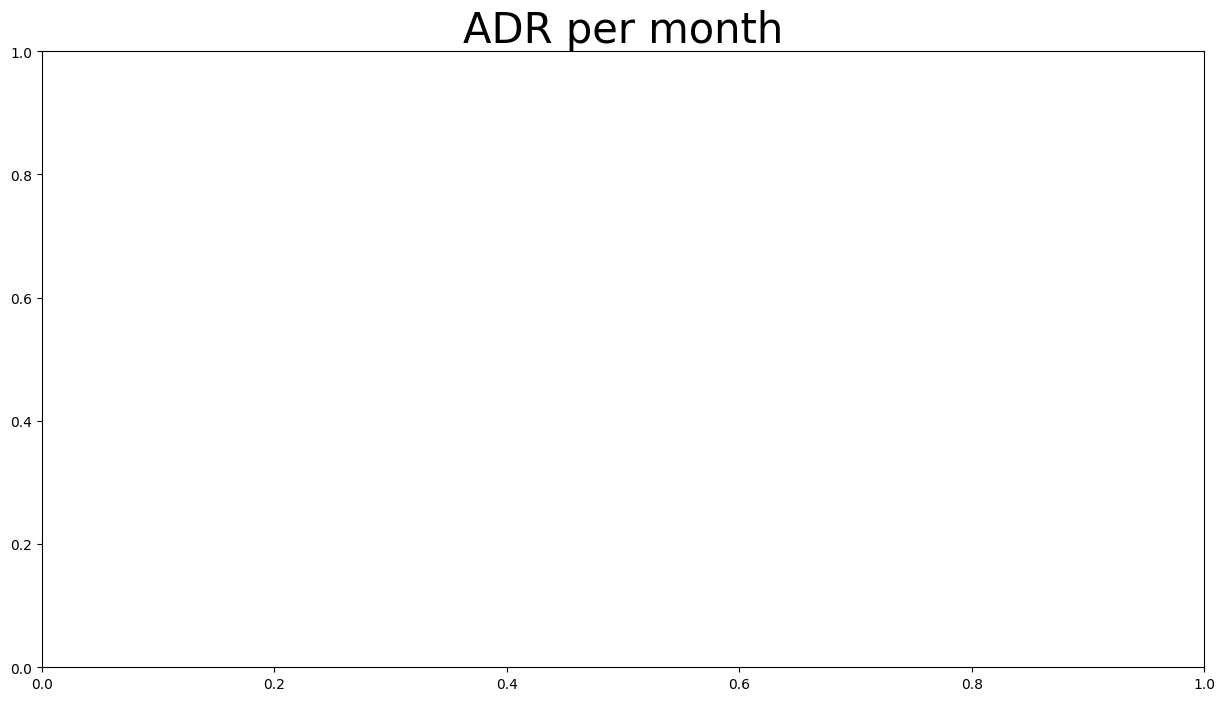

In [22]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot('arrival_date_month','adr', data = df[df['is_canceled'] == 1].groupby('arrival_date_month')[['adr']].sum().reset_index())
plt.legend(fontsize = 20)
plt.show()

In [21]:
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [35]:
df['month'] = pd.to_datetime(df['lead_time']).dt.month


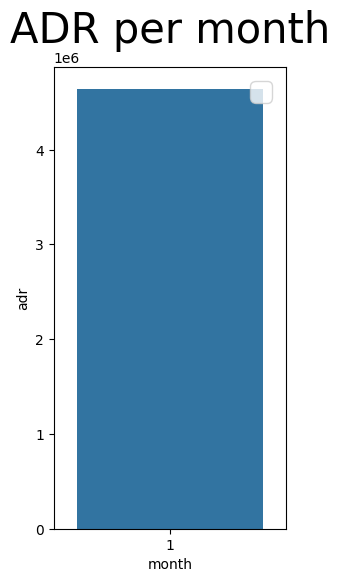

In [33]:
plt.figure(figsize=(3,6))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()


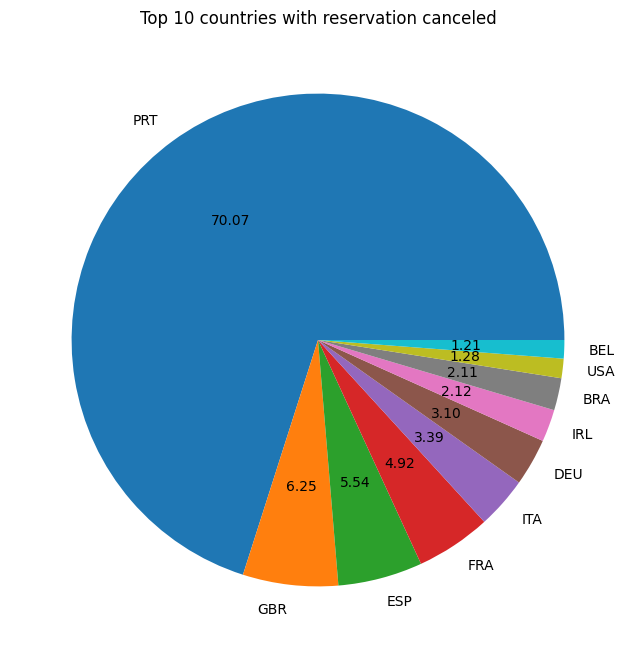

In [34]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()